# LLVM Tests

In [ ]:
!echo "Problem Set Analysis"

In [31]:
# imports

import pandas as pd
import os
import numpy as np

!ls


a.c                                  a_loop-vectorize.ll
a.ll                                 a_loop-vectorize_lines.txt
a_adce.ll                            a_mergefunc.ll
a_adce_lines.txt                     a_mergefunc_lines.txt
a_baseline                           a_simple-loop-unswitch.ll
a_baseline.s                         a_simple-loop-unswitch_lines.txt
a_baseline_lines.txt                 analysis.ipynb
a_extract-blocks.ll                  as.py
a_extract-blocks_lines.txt           baseline_time.txt
a_lcssa.ll                           makefile
a_lcssa_lines.txt                    passes_adce_time.txt
a_licm.ll                            passes_extract-blocks_time.txt
a_licm_lines.txt                     passes_lcssa_time.txt
a_loop-deletion.ll                   passes_licm_time.txt
a_loop-deletion_lines.txt            passes_loop-deletion_time.txt
a_loop-reduce.ll                     passes_loop-reduce_time.txt
a_loop-reduce_lines.txt              passes_loop-rotate_time.txt

In [32]:
def convert_to_seconds(time): # just handle the seconds
    time = time.strip()
    if str(time).strip() == "None":
        print("None")
        return None

    time = time.split('.')[1]
    time = time.replace('s', '')

    return float(time) / 1000

# Create csv
def create_csv():
    if os.path.exists('pb5.csv'):
        os.remove('pb5.csv')
    os.system('touch pb5.csv')
    with open('pb5.csv', 'w') as f:
        f.write('name, real, user, sys, lines\n')


# pull in the data to csv
def collate_datas():
    with open('baseline_time.txt', 'r') as f:
        data = f.readlines()
        print(data)
        real = data[1].split('\t')[1].replace('\n', '')
        user = data[2].split('\t')[1].replace('\n', '')
        sys = data[3].split('\t')[1].replace('\n', '')

        print(real, user, sys)
        with open('pb5.csv', 'a') as f:
            f.write('{}, {}, {}, {}, {}\n'.format("baseline_time", convert_to_seconds(real), convert_to_seconds(user), convert_to_seconds(sys), None))

        with open('a_baseline_lines.txt', 'r') as f:
            data = f.readlines()
            print(data)
            length = data[0].strip().split(' ')[0]
            with open('pb5.csv', 'a') as f:
                f.write('{}, {}, {}, {}, {}\n'.format("baseline_lines", None, None, None, length))
            
    

    # ('adce' 'loop-vectorize' 'loop-unroll' 'simple-loop-unswitch' 'loop-unroll-and-jam' 'extract-blocks' 'loop-rotate' 'loop-reduce' 'lcssa' 'mergefunc' 'loop-deletion' 'licm')
        a = ['adce', 'loop-vectorize', 'loop-unroll', 'simple-loop-unswitch', 'loop-unroll-and-jam', 'extract-blocks', 'loop-rotate', 'loop-reduce', 'lcssa', 'mergefunc', 'loop-deletion', 'licm']
    
    
    for i in a:
        with open('a_{}_lines.txt'.format(i), 'r') as f:
            data = f.readlines()
            print(data)
            length = data[0].strip().split(' ')[0]
            with open('pb5.csv', 'a') as f:
                f.write('{}, {}, {}, {}, {}\n'.format("{}_lines".format(i), None, None, None, length))

    for i in a:
            ### optimization_0_time.txt
        # real	0m0.020s
        # user	0m0.005s
        # sys	0m0.006s
        with open('passes_{}_time.txt'.format(i), 'r') as f:
            
            data = f.readlines()
            print(data)
            real = data[0].split(": ")[1]
            user = data[1].split(": ")[1]
            sys = data[2].split(": ")[1]
            
            real, user, sys = float(real), float(user), float(sys)
            
            # print(real, user, sys)
            with open('pb5.csv', 'a') as f:
                f.write('{}, {}, {}, {}, {}\n'.format("{}_time".format(i), real, user, sys, None))

        # with open('passes_{}_time.txt'.format(i), 'r') as f:
        #     data = f.readlines()
        #     print(data)
        #     real = data[1].split('\t')[1].replace('\n', '')
        #     user = data[2].split('\t')[1].replace('\n', '')
        #     sys = data[3].split('\t')[1].replace('\n', '')
        # 
        #     print(real, user, sys)
        #     with open('pb5.csv', 'a') as f:
        #         f.write('{}, {}, {}, {}, {}\n'.format("passes_0{}_time".format(i), real, user, sys, None))
        # 
        # with open('a_{}_lines.txt'.format(i), 'r') as f: #      194 a_0.s
        #     data = f.readlines()
        #     print(data)
        #     length = data[0].strip().split(' ')[0]
        #     with open('pb5.csv', 'a') as f:
        #         f.write('{}, {}, {}, {}, {}\n'.format("ass_O{}_lines".format(i), None, None, None, length))
        # 
        


create_csv()
collate_datas()




['\n', 'real\t0m0.175s\n', 'user\t0m0.001s\n', 'sys\t0m0.001s\n']
0m0.175s 0m0.001s 0m0.001s
['     350 a_baseline.s\n']
['      21 a_adce.ll\n']
['      21 a_loop-vectorize.ll\n']
['      21 a_loop-unroll.ll\n']
['      21 a_simple-loop-unswitch.ll\n']
['      21 a_loop-unroll-and-jam.ll\n']
['      21 a_extract-blocks.ll\n']
['      21 a_loop-rotate.ll\n']
['      21 a_loop-reduce.ll\n']
['      21 a_lcssa.ll\n']
['      21 a_mergefunc.ll\n']
['      21 a_loop-deletion.ll\n']
['      21 a_licm.ll\n']
['Real: 0.012\n', 'User: 0.005\n', 'Sys: 0.004\n']
['Real: 0.008\n', 'User: 0.005\n', 'Sys: 0.003\n']
['Real: 0.009\n', 'User: 0.005\n', 'Sys: 0.004\n']
['Real: 0.01\n', 'User: 0.005\n', 'Sys: 0.004\n']
['Real: 0.01\n', 'User: 0.005\n', 'Sys: 0.004\n']
['Real: 0.009\n', 'User: 0.005\n', 'Sys: 0.003\n']
['Real: 0.01\n', 'User: 0.005\n', 'Sys: 0.004\n']
['Real: 0.009\n', 'User: 0.005\n', 'Sys: 0.003\n']
['Real: 0.008\n', 'User: 0.004\n', 'Sys: 0.003\n']
['Real: 0.009\n', 'User: 0.005\n', '

In [33]:
# read csv
df = pd.read_csv('pb5.csv')
# set column names
df.columns = ['name', 'real', 'user', 'sys', 'lines']
df

,name,real,user,sys,lines
0,baseline_time,0.175,0.001,0.001,None
1,baseline_lines,None,None,None,350
2,adce_lines,None,None,None,21
3,loop-vectorize_lines,None,None,None,21
4,loop-unroll_lines,None,None,None,21
5,simple-loop-unswitch_lines,None,None,None,21
6,loop-unroll-and-jam_lines,None,None,None,21
7,extract-blocks_lines,None,None,None,21
8,loop-rotate_lines,None,None,None,21
9,loop-reduce_lines,None,None,None,21


In [26]:
# convert to seconds

    
    
    



<generator object DataFrame.iterrows at 0x13f237890>

In [40]:
df['lines'].head()


0      0.175
14     0.012
15     0.008
16     0.009
17      0.01
Name: real, dtype: object

/var/folders/jt/2x6l85pn7yl8y294wdngntx40000gn/T/ipykernel_52523/2697923895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['real'] = pd.to_numeric(time_df['real'])
/Users/devsog12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devsog12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devsog12/miniconda3/lib/python3.11

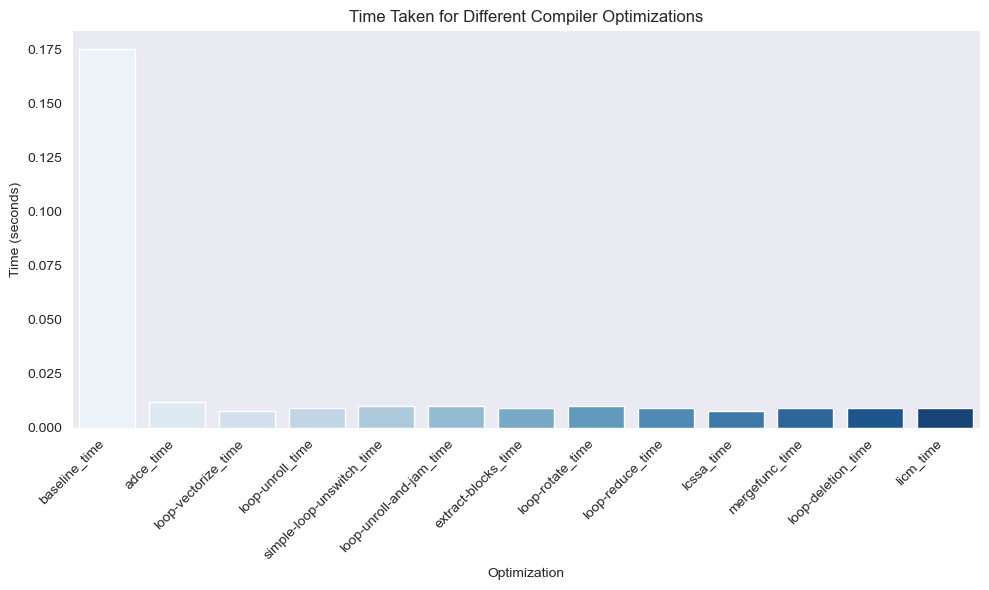

/var/folders/jt/2x6l85pn7yl8y294wdngntx40000gn/T/ipykernel_52523/2697923895.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_df['lines'] = pd.to_numeric(lines_df['lines'])
/Users/devsog12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devsog12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devsog12/miniconda3/lib/pytho

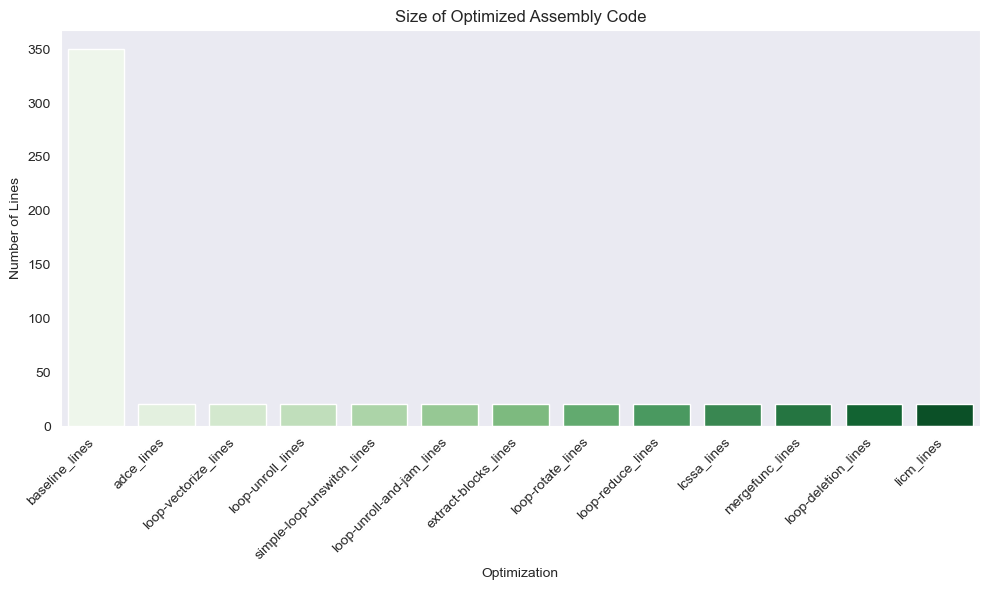

In [45]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the time taken for different optimizations
time_df = df[df['real'].notna() & df['name'].str.contains('time')]
time_df['real'] = pd.to_numeric(time_df['real'])

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='real', data=time_df, palette='Blues')
plt.xlabel('Optimization')
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Different Compiler Optimizations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the number of lines in the optimized assembly code
lines_df = df[df['lines'].notna() & df['name'].str.contains('lines')]

lines_df['lines'] = pd.to_numeric(lines_df['lines'])

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='lines', data=lines_df, palette='Greens')
plt.xlabel('Optimization')
plt.ylabel('Number of Lines')
plt.title('Size of Optimized Assembly Code')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [54]:
time_df.describe()

,real
count,13.000000
mean,0.022077
std,0.045959
min,0.008000
25%,0.009000
50%,0.009000
75%,0.010000
max,0.175000
